# Manipulation des données avec Pandas

---
## Présentation

Pandas est une librairie Python spécialisée dans l’analyse des données. Nous nous intéresserons
surtout aux fonctionnalités de manipulations de données qu’elle propose. Un objet de type "data frame", qui permet de réaliser de nombreuses opérations de filtrage, prétraitements, etc., préalables à la modélisation statistique.
La [librairie est très largement documentée](https://pandas.pydata.org/).
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1920px-Pandas_logo.svg.png" alt="Logo Librairie Panda" title="Librairie Panda" width="256">

Pour commencer, nous utiliserons la fonction de 🐼 pour lire ou écrire un fichier, dans notre cas un csv, mais 🐼 accepte d'autre format : [JSON, SQL, ...](https://pandas.pydata.org/docs/user_guide/io.html?highlight=read)

> *La fonction `.read_csv()` accepte plusieurs [arguments](https://pandas.pydata.org/docs/user_guide/io.html?highlight=read#io-read-csv-table), (qui vont permettre, avec la maitrise de cette librairie, de pouvoir commencer un pré-traitement de la donnée selon le type d'extension, les possibilitées sont tres vastes). Dans notre cas nous ne définirons le symbole de separation car par default ",".*

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
arbres_df = pa.read_csv("./p2-arbres-fr.csv", sep=";")
#vérifions le type de df
print(type(arbres_df))

<class 'pandas.core.frame.DataFrame'>


## Structure DataFrame
Une matrice DataFrame correspond à une matrice individus-variables où les lignes correspondent à des observations, les colonnes à des attributs décrivant les individus.
Nous allons maintenant afficher différente fonction pour analyser la structure
### shape
< *`.shape` : qui retourne un tuple qui représente les dimensions de notre Dataframe.*

In [2]:
arbres_df.shape

(200137, 18)

### head
Avec [🐼.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head), nous allons pouvoir observer un rapide aperçu de notre DataFrame:`notre_variable.head()`
> *La fonction  `.tail()`  est le pendant de la fonction `.head()`  . Elle permet d'afficher les derniers éléments du DataFrame.*

Ici, nous pouvons déjà observer que certaines colonnes &| lignes possèdent des valeurs vides représentées par `NaN`.
On peut définir le nombre de lignes afficher(par défaut 5)

In [3]:
arbres_df.head(n=4)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006


### isnull & sum
Profitons du fait de voir des `NaN` pour utiliser la combinaison de commande pratique de 🐼 `.isnull()` & `sum()`.
> [Isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html?highlight=isnull#pandas.DataFrame.isnull) nous retourne un tableau de booléens de même taille que notre Dataframe Les valeurs `NaN`, telles que None ou [numpy.NaN](https://numpy.org/doc/stable/reference/constants.html?highlight=nan#numpy.NaN), sont mappées aux valeurs `True`. Tout le reste est mappé sur des valeurs ``False``.
> [Sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum) Renvoie la somme des valeurs sur l'axe demandé.
> > *par defaut : `DataFrame.sum(axis=None, skipna=None, level=None, numeric_only=None, min_count=0, **kwargs)`*

In [4]:
arbres_df.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

#### type de chaque colonne
Afin de définir nos types de variables, et nous permettre de savoir comment les traiter dans notre etude ultérieurement.

<img src="https://user.oc-static.com/upload/2017/10/30/15094028245878_Variables.jpeg" width="512">

> *Dans notre Dataframe le Type Objet est bien sûr un String 😉.*

In [5]:
print(arbres_df.dtypes)

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object


### Describe

#### Génération des statistiques descriptive

Les [statistiques descriptives](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe) incluent celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion des `NaN` valeurs.

Analyse à la fois les séries numériques (Quantitative) et les séries d'objets (Qualitative), ainsi que les DataFrame ensembles de colonnes de types de données mixtes. La sortie varie en fonction de ce qui est fourni.
> *DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)*

<p><b>count :</b> comptage du nombre de cellules de notre Dataframe</p>
<p><b>mean :</b> moyenne des valeurs :
$$
\overline{X}_n=\frac{1}{n}\sum^{n}_{i=1}X_{i}
$$
</p>
<p><b>std :</b> ecart type :
$$
\sigma \ ou \ s=\sqrt{v},\\ avec \ v=\frac{1}{n}\sum^n_{i=1}(x_i-\overline{x})^{2}
$$
</p>
<p><b>percentile :</b> centiles inclut à la sortie, celui de 50% nous indique la mediane représentée par:
$$
\ Med = x_{(\frac{n+1}{2})}
$$
</p>
<p><b>Min & Max :</b> comme leurs noms l'indique, mais permet d'avoir une première approche des valeurs aberrantes </p>

> *dans notre exemple ci-dessous des arbres de "0" de hauteur ou de circonférence, à contrario de 800k m de haut ou circonférence de 250 m ! 😅*

In [6]:
arbres_df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


## Recherche et somme des valeurs manquante du DataFrame dans chaque colonne
> Précédemment nous avions utilisé la combinaison de fonction `.isnull().sum()`.
> Il en ressort que certaines colonnes sont quasiment vides (numeros, varieté..) et d'autres avec quelques valeurs manquantes comme "dominialité" et "genre".

commençons par "dominialité", nous affichons les valeurs qualitatives de cette colonne.
> *on remarque au passage la facilité pour cibler une colonne en particulier et l'utilisation de la fonction `.unique()` [doc.](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html?highlight=unique#pandas.Series.unique), qui retourne un tableau numpy.*

En dernière position on retrouve notre `NaN`.

In [7]:
arbres_df.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

### Traitement
Nous allons créer une requête dans notre Data Frame pour afficher l’individu en question.
> *Pour ce faire, on utilise la fonction `.isna()` [doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html?highlight=isna#pandas.DataFrame.isna).*

Dans le résultat ci-dessous, on peut constater que la valeur de la 'dominialite' manquante est renseigné dans le lieu, qui fait partie des valeurs possibles de la colonne.

In [8]:
arbres_df[arbres_df.domanialite.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


La solution retenue et en concordance avec notre colonne est le remplacement de cette valeur manquante.
> *la fonction `.fillna()` permet de remplir les valeurs NA/NaN en utilisant la méthode spécifiée,
> pour explication des paramètres utilisés :
    <ul>
    <li><b>inplace (bool), par défaut False</li>
    Si True, remplis sur place. Remarque : cela modifiera toutes les autres vues sur cet objet (par exemple, une tranche sans copie pour une colonne dans un DataFrame).
    <li><b>limit (int), par défaut Aucun </li>
    Si la méthode est spécifiée, il s'agit du nombre maximum de valeurs NaN consécutives à remplir en avant/en arrière. Autrement dit, s'il existe un écart avec plus de ce nombre de NaN consécutifs, il ne sera que partiellement comblé. Si la méthode n'est pas spécifiée, il s'agit du nombre maximum d'entrées le long de l'axe entier où NaNs sera rempli. Doit être supérieur à 0 sinon aucun.
    </ul>*

In [9]:
arbres_df.fillna("Jardin", axis=1, inplace=True, limit=1)
arbres_df.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES'], dtype=object)

#### Cellule manquante genre,espece

Après investigation, dans le cas de la colonne "genre", 7 des individus non renseignés, nous constatons qu’aucunes données de taille, circonférence et d’identification sont renseignées.
Pour ce faire, comme dans la recherche précédente, nous allons créer une requête.

In [10]:
arbres_df[arbres_df.genre.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
195409,2018853,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104005,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821259,2.354242
195410,2018854,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821229,2.354212
195475,2018919,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104030,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821281,2.353322
195476,2018920,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,104031,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821289,2.353228
195487,2018932,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105006,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821294,2.352001
195496,2018942,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105017,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821292,2.351425
195497,2018943,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105019,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821260,2.351363
195499,2018945,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105022,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821261,2.351296
195502,2018948,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,105025,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821283,2.351094
195503,2018949,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUP...,106001,NaN,NaN,NaN,NaN,0,0,NaN,0.0,48.821401,2.350885


Comme ces données n’ont pas d'intérêt significatif dans notre jeu (représente 0.8% des valeurs et trop de colonne vide), il est préférable de les supprimer.
Ceci étant, nous ne le feront pas sur notre csv ou notre Dataframe initial, sémantiquement déconseillé, on utilisera un ensemble de fonction 🐼 :
+ `.where()`: la fonction [where](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html?highlight=where#pandas.DataFrame.where), qui comme en Sql nous permet de remplacer les valeurs où la condition est False.
+ `.copy()` : la fonction [copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?highlight=copy#pandas.DataFrame.copy), qui crée avec une copie des données et des indices de l'objet appelant. Les modifications apportées aux données ou aux indices de la copie ne seront pas reflétées dans l'objet d'origine.
+ `.dropna()` : la fonction[dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna), va être utilisé pour extraire les individus aux valeurs manquantes sur la colonne “genre” grâce au sous-ensemble et stocker ces derniers dans une variable.


In [11]:
arbres_temp = arbres_df.copy()
arbres_temp[arbres_temp.lieu=="PC13 - JARDIN DE LA RUE DE LA POTERNE DES PEUPLIERS / 62 RUE DAMESME"]
arbres_genre_na = arbres_df.dropna(subset=['genre'])
arbres_genre_na.isna().sum()

id                          0
type_emplacement            0
domanialite                 0
arrondissement              0
complement_addresse    169219
numero                 200121
lieu                        0
id_emplacement              0
libelle_francais         1481
genre                       0
espece                   1736
variete                163344
circonference_cm            0
hauteur_m                   0
stade_developpement     67189
remarquable             63097
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

## Recherche des valeurs dupliquées du Dataframe

### Critère

Dans notre Data frame chaque arbre se trouve qu’il soit géolocalisé, ce qui rend notre recherche de duplicata fortement aisée (et le `.describe()` nous indique aucunes valeurs manquantes), car il va de soi que le croisement de coordonnées de géolocalisation oblige en l'unicité de l”entité.
La méthode sera de joindre les colonnes de localisation pour obtenir théoriquement un point coordonné et de vérifier ensuite les duplicants.
+ `.join()` fonction [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) qui une fois encore une méthode qui comme sql permet de joindre les colonnes d'un autre DataFrame sur l'index ou sur une colonne clé. Joignez efficacement plusieurs objets DataFrame par index à la fois en passant une liste.
+ `.duplicated()` fonction [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated) qui renvoie une série booléenne indiquant les lignes en double.
+ `.drop_duplicates()` fonction [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.Series.drop_duplicates.html#pandas.Series.drop_duplicates) qui renvoie la série avec les valeurs en double supprimées.
Méthode pour gérer la suppression des doublons :
 + 'first' : Supprime les doublons sauf pour la première occurrence.
 + 'last' : supprime les doublons à l'exception de la dernière occurrence.
 + False : supprimez tous les doublons.

In [12]:
geo_a = pa.DataFrame(arbres_genre_na.geo_point_2d_a)
geo_b = pa.DataFrame(arbres_genre_na.geo_point_2d_b)
coordonnees = geo_a.join(geo_b)
coordonnees_dupliquees = coordonnees.duplicated()
coordonnees_dupliquees.sum()

11

> *affichons nos valeurs dupliquées pour controler la veracité*

In [13]:
arbres_genre_na[coordonnees_dupliquees]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
10100,112287,Arbre,Jardin,PARIS 12E ARRDT,NaN,NaN,JARDIN PARTAGE BEL-AIR,6,Ailante,Ailanthus,altissima,NaN,0,0,NaN,NaN,48.838318,2.406610
76385,195525,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,NaN,NaN,VOIE DF/19,09VO19001,Peuplier,Populus,nigra,Italica',120,20,NaN,NaN,48.900332,2.386441
76386,195526,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,NaN,NaN,VOIE DF/19,09VO19002,Peuplier,Populus,nigra,Italica',100,20,NaN,NaN,48.900290,2.386442
76387,195527,Arbre,PERIPHERIQUE,PARIS 19E ARRDT,NaN,NaN,VOIE DF/19,09VO19003,Peuplier,Populus,nigra,Italica',165,20,NaN,NaN,48.900253,2.386444
185480,2006188,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,ROUTE DAUPHINE,402030,Tilleul,Tilia,platyphyllos,NaN,0,0,NaN,0.0,48.829912,2.439665
188304,2010609,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20023,Platane,Platanus,x hispanica,NaN,190,24,A,0.0,48.839118,2.438810
189134,2011523,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,190042,Peuplier,Populus,nigra,Italica',100,22,A,0.0,48.836416,2.446277
193017,2015806,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,3120005,Pin,Pinus,nigra,NaN,0,0,NaN,0.0,48.839561,2.446210
193577,2016369,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,210035,Pommier à fleurs,Malus,trilobata,NaN,0,0,NaN,0.0,48.836862,2.446518
193586,2016378,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,20128,Cèdre,Cedrus,libani subsp. atlantica,NaN,0,0,NaN,0.0,48.838550,2.439268


> *procédons au nettoyage de notre dataframe*

In [14]:
arbres_clean = arbres_genre_na.drop_duplicates(subset=['geo_point_2d_a','geo_point_2d_b'],keep='last').copy()
arbres_clean.describe()

,id,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,2.001110e+05,200111.000000,200111.000000,200111.000000,200111.000000
mean,3.870290e+05,83.386690,13.111593,48.854493,2.348203
std,5.453698e+05,673.233353,1971.345437,0.030234,0.051220
min,9.987400e+04,0.000000,0.000000,48.742290,2.210241
25%,1.559245e+05,30.000000,5.000000,48.835023,2.307525
50%,2.210690e+05,70.000000,8.000000,48.854166,2.351087
75%,2.740855e+05,115.000000,12.000000,48.876450,2.386832
max,2.024745e+06,250255.000000,881818.000000,48.911485,2.469759


In [15]:
arbres_clean.columns

Index(['id', 'type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'numero', 'lieu', 'id_emplacement',
       'libelle_francais', 'genre', 'espece', 'variete', 'circonference_cm',
       'hauteur_m', 'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

In [16]:
arbres_clean.count()

id                     200111
type_emplacement       200111
domanialite            200111
arrondissement         200111
complement_addresse     30903
numero                      1
lieu                   200111
id_emplacement         200111
libelle_francais       198630
genre                  200111
espece                 198375
variete                 36777
circonference_cm       200111
hauteur_m              200111
stade_developpement    132929
remarquable            137018
geo_point_2d_a         200111
geo_point_2d_b         200111
dtype: int64

In [17]:
def describe_columns(key_name):
    column_name_counts = arbres_clean[key_name].value_counts()
    for key,value in column_name_counts.iteritems():
        subset = arbres_clean[arbres_clean[key_name] == key].drop(['id'],axis=1)
        print("-"*20)
        print(f"{column_name_counts.name} : {key}")
        print(subset.describe())
        subset.hist()
        plt.show()
        subset.boxplot(vert=False)
        plt.show()

In [18]:
def count_by_columns():
    for key,value in arbres_clean.iteritems():
        print("*"*20)
        print(value.describe())
        print(f"liste de valeur(s) unique : {value.unique()}")

In [19]:
count_by_columns()

********************
count    2.001110e+05
mean     3.870290e+05
std      5.453698e+05
min      9.987400e+04
25%      1.559245e+05
50%      2.210690e+05
75%      2.740855e+05
max      2.024745e+06
Name: id, dtype: float64
liste de valeur(s) unique : [  99874   99875   99876 ... 2024743 2024744 2024745]
********************
count     200111
unique         1
top        Arbre
freq      200111
Name: type_emplacement, dtype: object
liste de valeur(s) unique : ['Arbre']
********************
count         200111
unique             9
top       Alignement
freq          104948
Name: domanialite, dtype: object
liste de valeur(s) unique : ['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES']
********************
count              200111
unique                 25
top       PARIS 15E ARRDT
freq                17151
Name: arrondissement, dtype: object
liste de valeur(s) unique : ['PARIS 7E ARRDT' 'PARIS 17E ARRDT' 'PARIS 16E ARRDT' 'PARIS 4E ARRDT'
 'PARIS 13E ARRDT'

In [20]:
arbres_clean[arbres_clean.stade_developpement=='Jardin']

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,Jardin,Jardin,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,Jardin,20,5,Jardin,0.0,48.85762,2.320962


In [21]:
arbre_temp = arbres_clean[arbres_clean.columns.difference(["domanialite"])].replace("Jardin", "").where(arbres_clean.stade_developpement=='Jardin')
arbre_temp.dropna()

,arrondissement,circonference_cm,complement_addresse,espece,genre,geo_point_2d_a,geo_point_2d_b,hauteur_m,id,id_emplacement,libelle_francais,lieu,numero,remarquable,stade_developpement,type_emplacement,variete
0,PARIS 7E ARRDT,20.0,,hippocastanum,Aesculus,48.85762,2.320962,5.0,99874.0,19,Marronnier,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,,0.0,,Arbre,


--------------------
stade_developpement : A
       circonference_cm     hauteur_m  geo_point_2d_a  geo_point_2d_b
count      64435.000000  64435.000000    64435.000000    64435.000000
mean         132.761325     13.330116       48.857051        2.344227
std         1179.942345     22.256600        0.024753        0.049449
min            0.000000      0.000000       48.742371        2.211330
25%           90.000000     10.000000       48.840102        2.304550
50%          115.000000     12.000000       48.857773        2.345071
75%          150.000000     15.000000       48.873827        2.383139
max       250255.000000   2525.000000       48.911050        2.469752


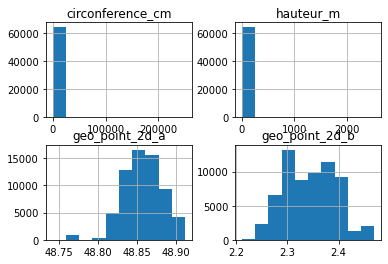

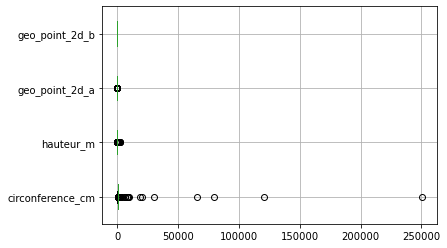

--------------------
stade_developpement : JA
       circonference_cm     hauteur_m  geo_point_2d_a  geo_point_2d_b
count      35443.000000  35443.000000    35443.000000    35443.000000
mean          70.976497      9.986993       48.854241        2.344251
std           63.454491     35.426939        0.023929        0.047971
min            0.000000      0.000000       48.742290        2.212229
25%           51.000000      6.000000       48.836690        2.306372
50%           65.000000      9.000000       48.853150        2.345470
75%           85.000000     10.000000       48.870452        2.379504
max         7540.000000   5155.000000       48.910689        2.469718


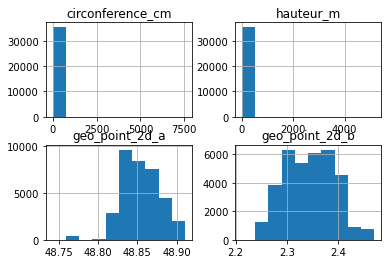

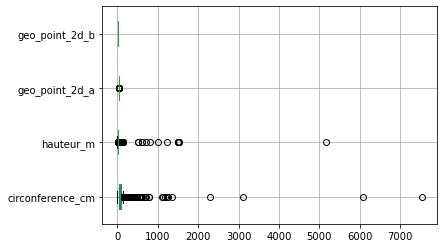

--------------------
stade_developpement : J
       circonference_cm      hauteur_m  geo_point_2d_a  geo_point_2d_b
count      26937.000000   26937.000000    26937.000000    26937.000000
mean          39.419720      38.605932       48.851984        2.353568
std           73.082536    5372.815555        0.024666        0.051922
min            0.000000       0.000000       48.759069        2.212541
25%           25.000000       5.000000       48.833242        2.315492
50%           35.000000       5.000000       48.847313        2.349694
75%           45.000000       6.000000       48.869577        2.390117
max         9035.000000  881818.000000       48.910713        2.469759


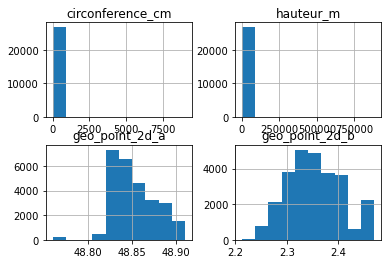

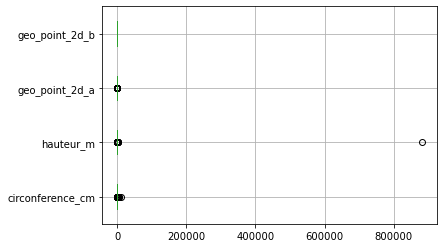

--------------------
stade_developpement : M
       circonference_cm    hauteur_m  geo_point_2d_a  geo_point_2d_b
count       6113.000000  6113.000000     6113.000000     6113.000000
mean         219.526092    19.239653       48.858447        2.345505
std           78.276548     7.045963        0.035401        0.046124
min            0.000000     0.000000       48.742421        2.211263
25%          190.000000    15.000000       48.835919        2.314240
50%          215.000000    20.000000       48.863210        2.349780
75%          245.000000    22.000000       48.886557        2.374434
max         2439.000000   327.000000       48.911003        2.465116


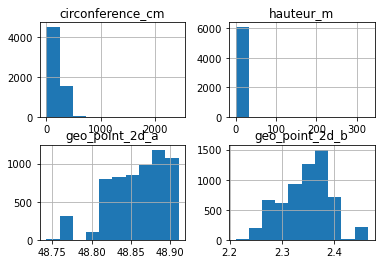

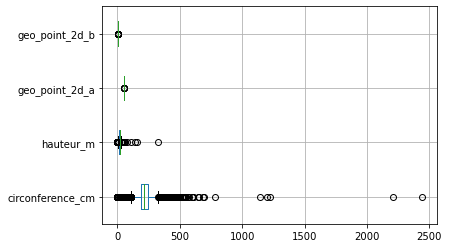

--------------------
stade_developpement : Jardin
       circonference_cm  hauteur_m  geo_point_2d_a  geo_point_2d_b
count               1.0        1.0         1.00000        1.000000
mean               20.0        5.0        48.85762        2.320962
std                 NaN        NaN             NaN             NaN
min                20.0        5.0        48.85762        2.320962
25%                20.0        5.0        48.85762        2.320962
50%                20.0        5.0        48.85762        2.320962
75%                20.0        5.0        48.85762        2.320962
max                20.0        5.0        48.85762        2.320962


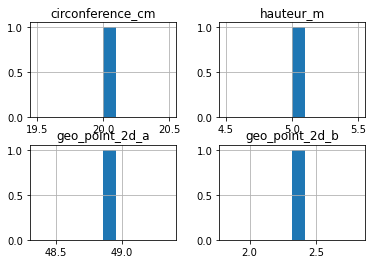

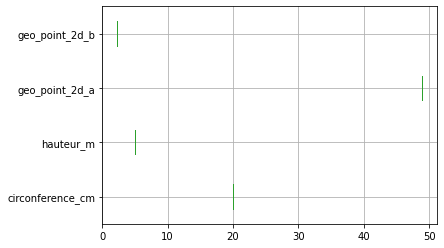

In [22]:

arbres_quantitative = arbres_clean.drop([
    "id",
    "complement_addresse",
    "numero",
    "circonference_cm",
    "hauteur_m",
    "geo_point_2d_a",
    "geo_point_2d_b"
],axis=1)
for key,value in arbres_quantitative.iteritems():
    describe_columns(key) if (key == 'stade_developpement') else ''